In [69]:
import spacy, benepar
#benepar.download('benepar_en3')

In [127]:
import time

In [70]:
nlp = spacy.load('en_core_web_md')

In [71]:
if spacy.__version__.startswith('2'):
    nlp.add_pipe(benepar.BeneparComponent("benepar_en3"))
else:
    nlp.add_pipe("benepar", config={"model": "benepar_en3"})

In [72]:
import sys
sys.path.append('../ConstituencyParser/')
from ConstituencyParser import ConstituencyParser
import pandas as pd

parser = ConstituencyParser()

In [73]:
# Use Constituency Parser to parse examples
def parse_golden(filename:str):
    golden_df = pd.read_csv(filename, usecols = [1,2,3,4], header=None, names = ['sent','has_clause','type','pred'])
    sents = golden_df.sent
    parses = [{}]*len(sents)
    for i,sent in enumerate(sents):
        sent_doc = nlp(sent)
        parsed_sent = list(sent_doc.sents)[0]
        parse = parser.get_embedded_clause(parsed_sent)
        type_parse =  parser.get_clause_type(parsed_sent)
        parses[i] = {'sentence': sent ,
                     'parsed_sentence' : str(parsed_sent),
                     'has_clause': parse[0], 
                     'predicate' : str(parse[1]),
                     'clause' : str(parse[2]),
                     'type' : type_parse,
                     'has_clause_real' : bool(golden_df.loc[i].has_clause),
                     'predicate_real': golden_df.loc[i].pred,
                     'type_real': golden_df.loc[i].type,
                     }
    return parses


In [74]:
# dec_path_golden = "../Datasets/Golden/declarative_golden_set_checked.csv"
# dec_parsed = parse_golden(dec_path_golden)

In [101]:
def read_file(file_path):
    with open(file_path, 'r', encoding = 'utf-8') as f:
        for line in f:
            yield line

In [100]:
dolma_path = "../Datasets/dolma/dolma/dolma_text/"
current_file = "v1_5r2_sample-0005.txt"

In [131]:
t = time.time()
times = []
count = 1
for line in read_file(dolma_path+current_file):
    sline = line.strip('\n')
    if len(line) <100 :
        try:
            doc = nlp(sline)
            for sent in doc.sents:
                parse = parser.get_embedded_clause(sent)
                # if parse[0]:
                #     print(f'Line {count} has an embedded clause!: {[sent]+parse}')
        except Exception as e:
            print(f"Error encountered while processing line {count}: {sline}")
            pass  # Do nothing, continue to next line
    count+=1
    if count % 1000 == 0:
        print(f'Time to parse 1000 entries: {time.time()-t}')
        times.append(time.time()-t)
        t = time.time()

Time to parse 1000 entries: 7.741547107696533
Time to parse 1000 entries: 5.508087873458862
Time to parse 1000 entries: 6.914326190948486
Error encountered while processing line 3899:  If I tried to remember what I’d scribbled, I’d pop a brain vessel.
Error encountered while processing line 3919:  It’s an attack on the massive, national, illusionary thinking that is in American air today.
Error encountered while processing line 3923: I’m disturbed Nikki Minaj is in Barbor Shop Three. YouTube just shoved the Ad in my face.  
Time to parse 1000 entries: 8.735262870788574
Time to parse 1000 entries: 4.1755571365356445
Time to parse 1000 entries: 3.7847092151641846
Error encountered while processing line 6811:  And it was this man’s duty to correctly size up situations.
Time to parse 1000 entries: 5.083039999008179
Time to parse 1000 entries: 5.353259086608887
Time to parse 1000 entries: 5.787467002868652
Time to parse 1000 entries: 6.117578029632568
Time to parse 1000 entries: 4.920176982

In [139]:
import numpy as np
np.mean(times)

5.6544434488865365

In [141]:
import matplotlib.pyplot as plt

(array([  2.,   0.,   3.,   0.,   4.,  12.,   8.,  31.,  47.,  56.,  81.,
         74.,  85.,  96.,  84., 103.,  86.,  58.,  59.,  41.,  33.,  36.,
         26.,  17.,  11.,  11.,   8.,  11.,   5.,  14.,  11.,   5.,   3.,
          3.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 2.26495171,  2.47831493,  2.69167815,  2.90504138,  3.1184046 ,
         3.33176782,  3.54513104,  3.75849427,  3.97185749,  4.18522071,
         4.39858394,  4.61194716,  4.82531038,  5.03867361,  5.25203683,
         5.46540005,  5.67876328,  5.8921265 ,  6.10548972,  6.31885294,
         6.53221617,  6.74

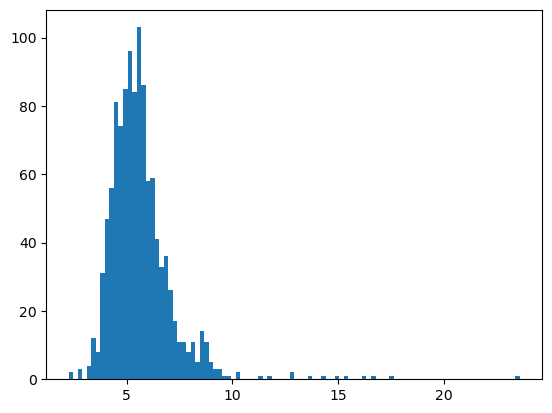

In [144]:
plt.hist(times,bins=100)